In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_target13 = pd.read_csv('data_target13_New2.csv')
data_target13.head()

,masse,CO2,dimension,cylindrée,puissance,autonomie électrique,fuel mode,fuel type
0,993.0,B,2492.0,999.0,48.0,0.0,M,petrol
1,1015.0,B,2492.0,999.0,48.0,0.0,M,petrol
2,1015.0,B,2492.0,999.0,48.0,0.0,M,petrol
3,993.0,B,2492.0,999.0,48.0,0.0,M,petrol
4,984.0,B,2492.0,999.0,48.0,0.0,M,petrol


In [3]:
#On partage le dataset en variables explicatives (masse, dimension, cylindrée, puissance, autonomie éléctrique, fuel mode,
#fuel type) et en variable cible :CO2

In [4]:
feats = data_target13.drop('CO2', axis = 1)
target = data_target13['CO2'] # Variable cible
feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70366 entries, 0 to 70365
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 70366 non-null  float64
 1   dimension             70366 non-null  float64
 2   cylindrée             70366 non-null  float64
 3   puissance             70366 non-null  float64
 4   autonomie électrique  70366 non-null  float64
 5   fuel mode             70366 non-null  object 
 6   fuel type             70366 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.8+ MB


In [5]:
# Séparation du données en jeu d'entrainement et de test de sorte que le jeu de test contienne 20% des données du dataset:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.20, random_state = 42)


In [6]:
# Séparation des colonnes catégorielles des colonnes numériques et création des dataframe correspondants 
# sur les jeux d'entrainement et de test

num = ['masse', 'cylindrée', 'puissance', 'dimension', 'autonomie électrique'] # num= liste des variables explicatives numériques
num_train = X_train[num]
num_test = X_test[num]

cat = ['fuel mode','fuel type'] # cat = liste des variables explicatives catégorielles
cat_train = X_train[cat]
cat_test = X_test[cat]

In [7]:
#Pas besoin de ce code car nous n'avons plus de NANs dans notre dataset
#Traitement des NAN
# Utilisation de la classe SimpleImputer pour remplir de manière rigoureuse les valeurs manquantes du jeu d'entraînement
# et du jeu de test en utilisant les stratégies "median" pour les variables numériques

#from sklearn.impute import SimpleImputer
#import numpy as np
#pd.options.mode.copy_on_write = True 
#num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#num_train.loc[:,num] = num_imputer.fit_transform(num_train[num])
#num_test.loc[:,num] = num_imputer.transform(num_test[num])

#Verifications finales des NANs:
num_train.isna().sum(axis = 0)
num_test.isna().sum(axis = 0)


masse                   0
cylindrée               0
puissance               0
dimension               0
autonomie électrique    0
dtype: int64

In [8]:
# Encodage des varialbles catégorielles

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # creation de 'encoder' un objet OneHotEncoder

# fit and transform des colonnes de cat_train columns / création d'un nouveau dataframe à partir d'un numpy array
one_cat_train_array = encoder.fit_transform(cat_train).toarray() 
one_cat_train_df = pd.DataFrame(one_cat_train_array, columns=encoder.get_feature_names_out())
one_cat_train_df.head()

# fit and transform des colonnes de cat_test columns / création d'un nouveau dataframe à partir d'un numpy array
one_cat_test_array = encoder.transform(cat_test).toarray() 
one_cat_test_df = pd.DataFrame(one_cat_test_array, columns=encoder.get_feature_names_out())
one_cat_test_df.head(10)

,fuel mode_B,fuel mode_F,fuel mode_H,fuel mode_M,fuel mode_P,fuel type_diesel,fuel type_diesel/electric,fuel type_e85,fuel type_lpg,fuel type_ng,fuel type_petrol,fuel type_petrol/electric
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Encodage de la colonne cible 'CO2_label'

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#le.fit_transform(y_train)
label_train_array = le.fit_transform(y_train)
label_train_df = pd.DataFrame(label_train_array)
print(label_train_df)

#le.transform(y_test)
label_test_array = le.fit_transform(y_train)
label_test_df = pd.DataFrame(label_train_array)
print(label_test_df)

       0
0      4
1      2
2      1
3      2
4      5
...   ..
56287  0
56288  4
56289  4
56290  3
56291  4

[56292 rows x 1 columns]
       0
0      4
1      2
2      1
3      2
4      5
...   ..
56287  0
56288  4
56289  4
56290  3
56291  4

[56292 rows x 1 columns]


In [10]:
# Standardisation des colonne numériques

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_train_scaled_array = sc.fit_transform(num_train)
num_train_scaled_df = pd.DataFrame(num_train_scaled_array, columns=sc.get_feature_names_out())
num_test_scaled_array = sc.transform(num_test)
num_test_scaled_df = pd.DataFrame(num_test_scaled_array, columns=sc.get_feature_names_out())


In [11]:
# Reconstitution des jeux d'entraînement et de test après encodage des variables catégorielles 
# en concaténant num_train avec cat_train et num_test avec cat_test.

X_train_new = pd.concat([num_train_scaled_df, one_cat_train_df.set_index(num_train_scaled_df.index)], axis=1)
X_test_new = pd.concat([num_test_scaled_df, one_cat_test_df.set_index(num_test_scaled_df.index)], axis=1)
X_test_new.head(10)

,masse,cylindrée,puissance,dimension,autonomie électrique,fuel mode_B,fuel mode_F,fuel mode_H,fuel mode_M,fuel mode_P,fuel type_diesel,fuel type_diesel/electric,fuel type_e85,fuel type_lpg,fuel type_ng,fuel type_petrol,fuel type_petrol/electric
0,-0.964363,-1.366886,-0.730857,-0.473762,-0.229778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.747803,0.076859,0.630520,0.093821,2.677879,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.056768,-0.777481,-0.386930,-0.024975,2.230547,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.294705,3.073001,4.127108,-0.704756,-0.341611,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.957111,0.115557,-0.673536,0.295116,-0.341611,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.135263,2.720251,4.814962,-1.298739,-0.341611,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-1.540808,-1.366886,-1.031793,-0.968748,-0.341611,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-0.270175,-0.777481,-0.458582,-0.737755,3.069294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.257211,0.048579,0.544538,0.097121,-0.341611,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.723273,0.120022,-0.100325,0.067422,2.286463,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
#Affichage des dimensions des jeux reconstitués.
print("Train Set:", X_train_new.shape) # Pour afficher les dimensions du train set recontitué
print("Test Set:", X_test_new.shape) # Pour afficher les dimensions du test set recontitué

Train Set: (56292, 17)
Test Set: (14074, 17)


In [13]:
# Entrainement sur 3 modèles de classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle


reglog1 = LogisticRegression()
reglog1.fit(X_train_new, y_train)
pickle.dump(reglog1, open("RegressionLogistique1", 'wb'))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble train', reglog1.score(X_train_new, y_train))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble test', reglog1.score(X_test_new, y_test))


dectree1 = DecisionTreeClassifier(random_state=42)
dectree1.fit(X_train_new, y_train)
pickle.dump(dectree1, open("DecisionTree1", 'wb'))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train', dectree1.score(X_train_new, y_train))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test', dectree1.score(X_test_new, y_test))


rfcl1 = RandomForestClassifier()
rfcl1.fit(X_train_new, y_train)
pickle.dump(rfcl1, open("RandomForest1", 'wb'))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train', rfcl1.score(X_train_new, y_train))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test', rfcl1.score(X_test_new, y_test)) 

Pour le modèle LogisticRegression Acuracy Score sur ensemble train 0.6960314076600582
Pour le modèle LogisticRegression Acuracy Score sur ensemble test 0.696603666335086
Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train 0.9175193633198323
Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test 0.8534887025721188
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train 0.917483834292617
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test 0.8573255648713941


In [14]:
#Calcul de matrice de confusion et rapport de classification des 3 modèles:
from sklearn.metrics import classification_report

print('Matrice de confusion et rapport de classification Pour la LogisticRegression')

y_pred = reglog1.predict(X_test_new)
display(pd.crosstab(y_test, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

print('Matrice de confusion et rapport de classification Pour la DecisionTreeClassifier')

y_pred = dectree1.predict(X_test_new)
display(pd.crosstab(y_test, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

print('Matrice de confusion et rapport de classification Pour la RandomForestClassifier')

y_pred = rfcl1.predict(X_test_new)
display(pd.crosstab(y_test, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Matrice de confusion et rapport de classification Pour la LogisticRegression


Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,1288,27,6,0,1,3,16
B,5,302,714,13,1,2,0
C,10,117,2666,479,22,9,0
D,6,5,546,1753,496,18,0
E,4,3,26,537,2112,283,15
F,1,6,7,13,551,958,121
G,0,1,9,0,13,184,725


              precision    recall  f1-score   support

           A       0.98      0.96      0.97      1341
           B       0.66      0.29      0.40      1037
           C       0.67      0.81      0.73      3303
           D       0.63      0.62      0.62      2824
           E       0.66      0.71      0.68      2980
           F       0.66      0.58      0.62      1657
           G       0.83      0.78      0.80       932

    accuracy                           0.70     14074
   macro avg       0.73      0.68      0.69     14074
weighted avg       0.70      0.70      0.69     14074

Matrice de confusion et rapport de classification Pour la DecisionTreeClassifier


Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,1325,8,3,2,2,0,1
B,11,757,255,8,5,0,1
C,4,223,2803,260,9,2,2
D,7,3,296,2295,221,0,2
E,4,4,14,260,2548,135,15
F,3,0,2,10,151,1433,58
G,0,0,2,0,21,58,851


              precision    recall  f1-score   support

           A       0.98      0.99      0.98      1341
           B       0.76      0.73      0.75      1037
           C       0.83      0.85      0.84      3303
           D       0.81      0.81      0.81      2824
           E       0.86      0.86      0.86      2980
           F       0.88      0.86      0.87      1657
           G       0.92      0.91      0.91       932

    accuracy                           0.85     14074
   macro avg       0.86      0.86      0.86     14074
weighted avg       0.85      0.85      0.85     14074

Matrice de confusion et rapport de classification Pour la RandomForestClassifier


Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,1320,12,3,0,3,1,2
B,9,742,276,8,2,0,0
C,3,188,2823,279,10,0,0
D,7,1,274,2309,232,0,1
E,1,2,12,235,2557,159,14
F,2,0,3,4,137,1448,63
G,0,0,0,0,15,50,867


              precision    recall  f1-score   support

           A       0.98      0.98      0.98      1341
           B       0.79      0.72      0.75      1037
           C       0.83      0.85      0.84      3303
           D       0.81      0.82      0.82      2824
           E       0.87      0.86      0.86      2980
           F       0.87      0.87      0.87      1657
           G       0.92      0.93      0.92       932

    accuracy                           0.86     14074
   macro avg       0.87      0.86      0.86     14074
weighted avg       0.86      0.86      0.86     14074



In [15]:
# Prédictions des modèles sur le jeu de train

from sklearn.metrics import classification_report

print('Matrice de confusion et rapport de classification Pour la LogisticRegression')

y_pred = reglog1.predict(X_train_new)
display(pd.crosstab(y_train, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_train, y_pred))

print('Matrice de confusion et rapport de classification Pour la DecisionTreeClassifier')

y_pred = dectree1.predict(X_train_new)
display(pd.crosstab(y_train, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_train, y_pred))

print('Matrice de confusion et rapport de classification Pour la RandomForestClassifier')

y_pred = rfcl1.predict(X_train_new)
display(pd.crosstab(y_train, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_train, y_pred))

Matrice de confusion et rapport de classification Pour la LogisticRegression


Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,5124,124,28,2,6,9,28
B,11,1087,2950,81,4,2,0
C,44,464,10533,1949,98,25,0
D,23,21,2136,7148,1842,83,2
E,15,12,130,2149,8355,1172,73
F,5,20,29,56,2175,3972,498
G,7,0,24,4,59,751,2962


              precision    recall  f1-score   support

           A       0.98      0.96      0.97      5321
           B       0.63      0.26      0.37      4135
           C       0.67      0.80      0.73     13113
           D       0.63      0.64      0.63     11255
           E       0.67      0.70      0.68     11906
           F       0.66      0.59      0.62      6755
           G       0.83      0.78      0.80      3807

    accuracy                           0.70     56292
   macro avg       0.72      0.68      0.69     56292
weighted avg       0.70      0.70      0.69     56292

Matrice de confusion et rapport de classification Pour la DecisionTreeClassifier


Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,5300,20,0,0,0,0,1
B,25,3567,539,4,0,0,0
C,5,522,11922,654,10,0,0
D,9,3,773,10036,433,0,1
E,6,1,2,737,10902,251,7
F,2,0,0,2,449,6245,57
G,1,0,0,1,14,114,3677


              precision    recall  f1-score   support

           A       0.99      1.00      0.99      5321
           B       0.87      0.86      0.86      4135
           C       0.90      0.91      0.90     13113
           D       0.88      0.89      0.88     11255
           E       0.92      0.92      0.92     11906
           F       0.94      0.92      0.93      6755
           G       0.98      0.97      0.97      3807

    accuracy                           0.92     56292
   macro avg       0.93      0.92      0.93     56292
weighted avg       0.92      0.92      0.92     56292

Matrice de confusion et rapport de classification Pour la RandomForestClassifier


Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,5290,28,1,0,0,0,2
B,17,3442,672,4,0,0,0
C,4,389,11942,767,11,0,0
D,9,2,662,10080,499,1,2
E,6,1,1,671,10885,325,17
F,2,0,0,1,376,6294,82
G,0,0,0,0,4,89,3714


              precision    recall  f1-score   support

           A       0.99      0.99      0.99      5321
           B       0.89      0.83      0.86      4135
           C       0.90      0.91      0.91     13113
           D       0.87      0.90      0.89     11255
           E       0.92      0.91      0.92     11906
           F       0.94      0.93      0.93      6755
           G       0.97      0.98      0.97      3807

    accuracy                           0.92     56292
   macro avg       0.93      0.92      0.92     56292
weighted avg       0.92      0.92      0.92     56292



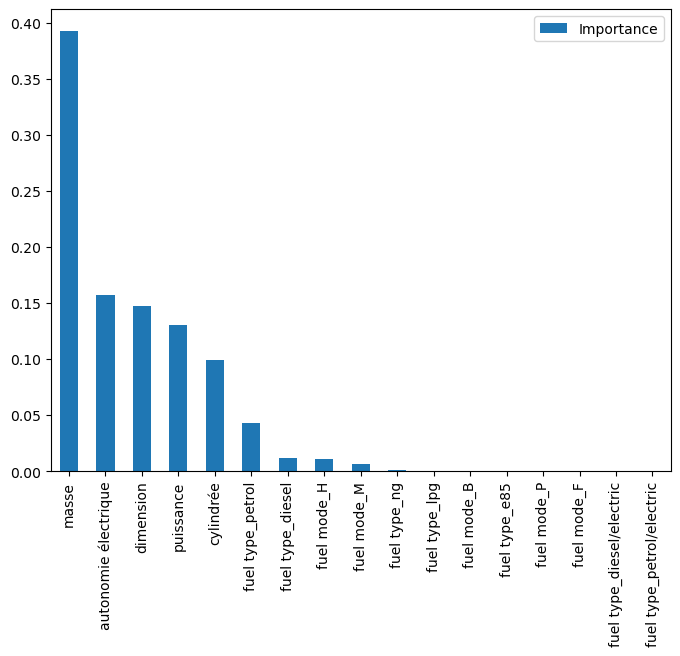

In [16]:
# Graphique des importances
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(dectree1.feature_importances_, index=X_train_new.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6));
# Enregistrement (Exportation) du dataframe feat_importances sous format csv 
feat_importances.to_csv('feat_importances.csv', index=False)

In [17]:
# Essai 1 Optimisation des 3 modèles en prenant en compte 5 premières variables plus importantes dans la classification

X_train_new2 = X_train_new[['masse', 'autonomie électrique', 'puissance', 'dimension', 'cylindrée']]
X_test_new2 = X_test_new[['masse', 'autonomie électrique', 'puissance', 'dimension', 'cylindrée']]
dectree2 = DecisionTreeClassifier(random_state=42)
dectree2.fit(X_train_new2, y_train)
pickle.dump(dectree2, open("DecisionTree2", 'wb'))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train', dectree2.score(X_train_new2, y_train))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test', dectree2.score(X_test_new2, y_test))

reglog2 = LogisticRegression()
reglog2.fit(X_train_new2, y_train)
pickle.dump(reglog2, open("RegressionLogistique2", 'wb'))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble train', reglog2.score(X_train_new2, y_train))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble test', reglog2.score(X_test_new2, y_test))

rfcl2 = RandomForestClassifier()
rfcl2.fit(X_train_new2, y_train)
pickle.dump(rfcl2, open("RandomForest2", 'wb'))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train', rfcl2.score(X_train_new2, y_train))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test', rfcl2.score(X_test_new2, y_test)) 


Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train 0.9167732537483124
Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test 0.8522097484723604
Pour le modèle LogisticRegression Acuracy Score sur ensemble train 0.6366268741561856
Pour le modèle LogisticRegression Acuracy Score sur ensemble test 0.6372033537018615
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train 0.9167554892347047
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test 0.8583913599545261


In [18]:
#Surechantillonage pour optimiser le modèl:

In [19]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

rOs = RandomOverSampler()
X_ro1, y_ro1 = rOs.fit_resample(X_train_new, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro1).value_counts(normalize = True)))

rfcl5 = RandomForestClassifier()
rfcl5.fit(X_ro1, y_ro1)
pickle.dump(rfcl5, open("RandomForest5", 'wb'))

print('Score sur ensemble train', rfcl5.score(X_ro1, y_ro1))
print('Score sur ensemble test', rfcl5.score(X_test_new, y_test))

from sklearn.metrics import classification_report

y_pred_new = rfcl5.predict(X_test_new)


display(pd.crosstab(y_test,y_pred_new))
print(classification_report(y_test, y_pred_new))

Classes échantillon oversampled : {'E': 0.14285714285714285, 'C': 0.14285714285714285, 'B': 0.14285714285714285, 'F': 0.14285714285714285, 'A': 0.14285714285714285, 'G': 0.14285714285714285, 'D': 0.14285714285714285}
Score sur ensemble train 0.9330871218311163
Score sur ensemble test 0.850930794372602


col_0,A,B,C,D,E,F,G
CO2,,,,,,,
A,1321,9,3,3,3,0,2
B,11,858,161,5,2,0,0
C,3,372,2604,315,9,0,0
D,7,1,242,2345,228,0,1
E,2,1,11,245,2501,206,14
F,2,0,3,4,109,1470,69
G,0,0,0,0,14,41,877


              precision    recall  f1-score   support

           A       0.98      0.99      0.98      1341
           B       0.69      0.83      0.75      1037
           C       0.86      0.79      0.82      3303
           D       0.80      0.83      0.82      2824
           E       0.87      0.84      0.86      2980
           F       0.86      0.89      0.87      1657
           G       0.91      0.94      0.93       932

    accuracy                           0.85     14074
   macro avg       0.85      0.87      0.86     14074
weighted avg       0.85      0.85      0.85     14074



In [20]:
#Optimisation des hyperparamètres:

In [21]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(10, 50, 10)}

cl3 = RandomForestClassifier()

clf_gs = GridSearchCV(cl3, param_grid, cv=5, verbose=1, scoring='recall')

clf_gs.fit(X_train_new, y_train)
pickle.dump(clf_gs, open("GridSearchCV", 'wb'))


print(clf_gs.best_params_)

y_pred_test = clf_gs.predict(X_test_new)

display(pd.crosstab(y_pred_test, y_test, colnames =  ['Real classes'], rownames = ['Predicted classes']))

print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'gini', 'max_depth': 10}


Real classes,A,B,C,D,E,F,G
Predicted classes,,,,,,,
A,1312,4,3,5,2,1,0
B,16,589,104,2,1,0,0
C,4,421,2878,365,16,1,0
D,2,18,293,2080,310,9,0
E,3,3,25,369,2436,198,6
F,2,1,0,2,200,1376,63
G,2,1,0,1,15,72,863


              precision    recall  f1-score   support

           A       0.99      0.98      0.98      1341
           B       0.83      0.57      0.67      1037
           C       0.78      0.87      0.82      3303
           D       0.77      0.74      0.75      2824
           E       0.80      0.82      0.81      2980
           F       0.84      0.83      0.83      1657
           G       0.90      0.93      0.92       932

    accuracy                           0.82     14074
   macro avg       0.84      0.82      0.83     14074
weighted avg       0.82      0.82      0.82     14074



In [22]:
#Métrique d'évaluation personnalisé

In [23]:
#Modele persistence

In [24]:
# Essai 2 Optimisation des 3 modèles en prenant en compte 6 premières variables plus importantes dans la classification

X_train_new3 = X_train_new[['masse', 'autonomie électrique', 'puissance', 'dimension', 'cylindrée','fuel type_petrol']]
X_test_new3 = X_test_new[['masse', 'autonomie électrique', 'puissance', 'dimension', 'cylindrée','fuel type_petrol']]
dectree3 = DecisionTreeClassifier(random_state=42)
dectree3.fit(X_train_new3, y_train)
pickle.dump(dectree3, open("DecisionTree3", 'wb'))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train', dectree3.score(X_train_new3, y_train))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test', dectree3.score(X_test_new3, y_test))

reglog3 = LogisticRegression()
reglog3.fit(X_train_new3, y_train)
pickle.dump(reglog3, open("RegressionLogistiue3", 'wb'))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble train', reglog3.score(X_train_new3, y_train))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble test', reglog3.score(X_test_new3, y_test))

rfcl3 = RandomForestClassifier()
rfcl3.fit(X_train_new3, y_train)
pickle.dump(rfcl3, open("RandomForest3", 'wb'))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train', rfcl3.score(X_train_new3, y_train))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test', rfcl3.score(X_test_new3, y_test)) 


Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train 0.9173239536701485
Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test 0.8532755435554924
Pour le modèle LogisticRegression Acuracy Score sur ensemble train 0.6760818588787039
Pour le modèle LogisticRegression Acuracy Score sur ensemble test 0.6752877646724457
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train 0.9173239536701485
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test 0.8584624129600682


In [25]:
# Matrice de confusion et rapport dde classification pour le modèle rfcl3
y_pred = rfcl3.predict(X_test_new3)
display(pd.crosstab(y_test, y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,1318,12,3,2,3,1,2
B,6,744,279,6,2,0,0
C,3,192,2823,275,10,0,0
D,7,1,266,2313,236,0,1
E,1,2,9,239,2572,143,14
F,2,0,3,3,141,1445,63
G,0,0,0,0,18,47,867


              precision    recall  f1-score   support

           A       0.99      0.98      0.98      1341
           B       0.78      0.72      0.75      1037
           C       0.83      0.85      0.84      3303
           D       0.82      0.82      0.82      2824
           E       0.86      0.86      0.86      2980
           F       0.88      0.87      0.88      1657
           G       0.92      0.93      0.92       932

    accuracy                           0.86     14074
   macro avg       0.87      0.86      0.87     14074
weighted avg       0.86      0.86      0.86     14074



In [26]:
# Essai 3 Optimisation des 3 modèles en prenant en compte 7 premières variables plus importantes dans la classification

X_train_new4 = X_train_new[['masse', 'autonomie électrique', 'puissance', 'dimension', 'cylindrée','fuel type_petrol','fuel mode_H']]
X_test_new4 = X_test_new[['masse', 'autonomie électrique', 'puissance', 'dimension', 'cylindrée','fuel type_petrol','fuel mode_H']]
dectree4 = DecisionTreeClassifier(random_state=42)
dectree4.fit(X_train_new4, y_train)
pickle.dump(dectree4, open("DecisionTree4", 'wb'))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train', dectree4.score(X_train_new4, y_train))
print('Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test', dectree4.score(X_test_new4, y_test))

reglog4 = LogisticRegression()
reglog4.fit(X_train_new4, y_train)
pickle.dump(reglog4, open("RegressionLogistiue4", 'wb'))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble train', reglog4.score(X_train_new4, y_train))
print('Pour le modèle LogisticRegression Acuracy Score sur ensemble test', reglog4.score(X_test_new4, y_test))

rfcl4 = RandomForestClassifier()
rfcl4.fit(X_train_new4, y_train)
pickle.dump(rfcl4, open("RandomForest4", 'wb'))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train', rfcl4.score(X_train_new4, y_train))
print('Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test', rfcl4.score(X_test_new4, y_test)) 


Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble train 0.9173239536701485
Pour le modèle DecisionTreeClassifier Acuracy Score sur ensemble test 0.8536308085832031
Pour le modèle LogisticRegression Acuracy Score sur ensemble train 0.6907731116322036
Pour le modèle LogisticRegression Acuracy Score sur ensemble test 0.6911325849083416
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble train 0.9173061891565409
Pour le modèle RandomForestClassifier Acuracy Score sur ensemble test 0.8572545118658519


In [27]:
#Méthode Oversampling pour optimiser:

In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [29]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_new, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_new, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))


Classes échantillon oversampled : {'E': 13113, 'C': 13113, 'B': 13113, 'F': 13113, 'A': 13113, 'G': 13113, 'D': 13113}
Classes échantillon SMOTE : {'E': 13113, 'C': 13113, 'B': 13113, 'F': 13113, 'A': 13113, 'G': 13113, 'D': 13113}


In [30]:
# Créer un modèle de classification SVM, en ajoutant l'argument gamma='scale'
# Entraîner le modèle sur l'ensemble issu du RandomOversampler, 
#puis afficher la matrice de confusion obtenue 
#grâce aux prédictions sur l'ensemble de test
#Afficher le rapport de résultat sur l'ensemble de test 
#obtenu par classification_report_imbalanced

In [31]:
svm_ro = SVC(gamma='scale')
svm_ro.fit(X_ro, y_ro)
pickle.dump(svm_ro, open("SVM_Oversampling_Randomsampler", 'wb'))

y_pred = svm_ro.predict(X_test_new)
print(pd.crosstab(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

col_0     A    B     C     D     E     F    G
CO2                                          
A      1301   30     2     0     1     2    5
B         1  795   219    20     0     2    0
C         3  773  2008   482    20    16    1
D         5   21   331  1996   448    11   12
E         3    7    15   456  2042   434   23
F         1    2     2     6   172  1296  178
G         0    0     0     0     5    44  883
                   pre       rec       spe        f1       geo       iba       sup

          A       0.99      0.97      1.00      0.98      0.98      0.97      1341
          B       0.49      0.77      0.94      0.60      0.85      0.71      1037
          C       0.78      0.61      0.95      0.68      0.76      0.56      3303
          D       0.67      0.71      0.91      0.69      0.80      0.63      2824
          E       0.76      0.69      0.94      0.72      0.80      0.63      2980
          F       0.72      0.78      0.96      0.75      0.87      0.74      1657
    

In [32]:
#Créer un modèle de classification SVM, en ajoutant l'argument gamma='scale'
#Entraîner le modèle sur l'ensemble issu du SMOTE, 
#puis afficher la matrice de confusion
#Afficher le rapport de résultat sur 
#l'ensemble de test obtenu par classification_report_imbalanced


In [33]:
svm_sm = SVC(gamma='scale')
svm_sm.fit(X_sm, y_sm)
pickle.dump(svm_sm, open("SVM_Oversampling_SMOTE", 'wb'))

y_pred = svm_sm.predict(X_test_new)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0     A    B     C     D     E     F    G
CO2                                          
A      1301   30     2     0     1     2    5
B         1  795   219    19     0     2    1
C         3  761  2018   486    18    16    1
D         5   21   333  1997   445    10   13
E         3    8    14   456  2055   420   24
F         1    2     2     6   168  1304  174
G         0    0     0     0     6    46  880
                   pre       rec       spe        f1       geo       iba       sup

          A       0.99      0.97      1.00      0.98      0.98      0.97      1341
          B       0.49      0.77      0.94      0.60      0.85      0.71      1037
          C       0.78      0.61      0.95      0.69      0.76      0.56      3303
          D       0.67      0.71      0.91      0.69      0.80      0.63      2824
          E       0.76      0.69      0.94      0.72      0.81      0.63      2980
          F       0.72      0.79      0.96      0.75      0.87      0.74      1657
    

In [34]:
#Méthode Undersampling:

In [35]:
#Random Undersampling
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train_new, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

#Centroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train_new, y_train)
print('Classes échantillon CC :', dict(pd.Series(y_cc).value_counts()))

Classes échantillon undersampled : {'A': 3807, 'B': 3807, 'C': 3807, 'D': 3807, 'E': 3807, 'F': 3807, 'G': 3807}
Classes échantillon CC : {'A': 3807, 'B': 3807, 'C': 3807, 'D': 3807, 'E': 3807, 'F': 3807, 'G': 3807}


In [36]:
#Créer un modèle de classification SVM, en ajoutant l'argument gamma='scale
#Entraîner le modèle sur l'ensemble issu du RandomUnderSampler, 
#puis afficher la matrice de confusion
# Afficher le rapport de résultat sur 
#l'ensemble de test obtenu par classification_report_imbalanced

In [37]:
svm_ru = SVC(gamma='scale')
svm_ru.fit(X_ru, y_ru)
pickle.dump(svm_ru, open("SVM_Undersampling_Randomsampler", 'wb'))

y_pred = svm_ru.predict(X_test_new)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0     A    B     C     D     E     F    G
CO2                                          
A      1301   31     0     1     1     2    5
B         1  796   213    24     0     2    1
C         3  791  1970   502    20    15    2
D         6   27   335  1966   464    13   13
E         3   11    11   468  2024   435   28
F         1    1     3     7   198  1250  197
G         0    0     0     0     3    62  867
                   pre       rec       spe        f1       geo       iba       sup

          A       0.99      0.97      1.00      0.98      0.98      0.97      1341
          B       0.48      0.77      0.93      0.59      0.85      0.70      1037
          C       0.78      0.60      0.95      0.68      0.75      0.55      3303
          D       0.66      0.70      0.91      0.68      0.80      0.62      2824
          E       0.75      0.68      0.94      0.71      0.80      0.62      2980
          F       0.70      0.75      0.96      0.73      0.85      0.71      1657
    

In [38]:
svm_cc = SVC(gamma='scale')
svm_cc.fit(X_cc, y_cc)
pickle.dump(svm_cc, open("SVM_Undersampling_ClusterCentroids", 'wb'))

y_pred = svm_cc.predict(X_test_new)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0     A    B     C     D     E     F    G
CO2                                          
A      1301   30     1     1     3     0    5
B         1  807   209    16     1     3    0
C         3  818  1985   463    32     1    1
D         6   22   421  1925   434     4   12
E         3    5    16   531  1895   509   21
F         1    1     2     9   255  1185  204
G         0    0     0     0     3    52  877
                   pre       rec       spe        f1       geo       iba       sup

          A       0.99      0.97      1.00      0.98      0.98      0.97      1341
          B       0.48      0.78      0.93      0.59      0.85      0.71      1037
          C       0.75      0.60      0.94      0.67      0.75      0.55      3303
          D       0.65      0.68      0.91      0.67      0.79      0.61      2824
          E       0.72      0.64      0.93      0.68      0.77      0.58      2980
          F       0.68      0.72      0.95      0.69      0.83      0.67      1657
    

In [39]:
#Méthode predic proba pour retourner les prob d'appartenir à chaucune des classes
#au lieu de  la classe plus probable

In [40]:
svm_proba = SVC(probability=True, gamma='scale') # 'probability= True' est nécessaire pour retourner les probas
svm_proba.fit(X_ru, y_ru)                        # mais ralentit l'entraînement
pickle.dump(svm_proba, open("SVM_Undersampling_Proba_appart_classe", 'wb'))

threshold = 0.5 # Tester avec 0.4, 0.6, ...

probs = svm_proba.predict_proba(X_test_new)
pred_class = (probs[:,1]>=threshold).astype('int')

print(pd.crosstab(y_test, pred_class))
print(classification_report_imbalanced(y_test, y_pred))

col_0     0    1
CO2             
A      1310   31
B       271  766
C      2602  701
D      2810   14
E      2974    6
F      1656    1
G       932    0
                   pre       rec       spe        f1       geo       iba       sup

          A       0.99      0.97      1.00      0.98      0.98      0.97      1341
          B       0.48      0.78      0.93      0.59      0.85      0.71      1037
          C       0.75      0.60      0.94      0.67      0.75      0.55      3303
          D       0.65      0.68      0.91      0.67      0.79      0.61      2824
          E       0.72      0.64      0.93      0.68      0.77      0.58      2980
          F       0.68      0.72      0.95      0.69      0.83      0.67      1657
          G       0.78      0.94      0.98      0.85      0.96      0.92       932

avg / total       0.72      0.71      0.94      0.71      0.82      0.66     14074



In [41]:
#'utiliser le paramètre class_weight disponible
#dans la plupart des classes d'algorithmes de scikit-learn.
#Il permet de pénaliser les erreurs faites sur une classe par un nouveau poids
#. Plus le poids d'une classe est important, 
#plus les erreurs sur cette classe 
#sont pénalisées, et plus on lui donne de l'importance.

In [42]:
svm_poids = SVC(gamma='scale', class_weight='balanced')
svm_poids.fit(X_train_new, y_train)
pickle.dump(svm_poids, open("SVM_Poids_classe", 'wb'))

preds = svm_poids.predict(X_test_new)

print(pd.crosstab(y_test, preds))
print(classification_report_imbalanced(y_test, y_pred))

col_0     A    B     C     D     E     F    G
CO2                                          
A      1301   30     2     0     1     3    4
B         1  793   220    20     0     1    2
C         3  756  2031   479    17    16    1
D         6   22   330  2000   443    11   12
E         3    7    15   458  2055   416   26
F         1    2     1     7   176  1290  180
G         0    0     0     0     5    44  883
                   pre       rec       spe        f1       geo       iba       sup

          A       0.99      0.97      1.00      0.98      0.98      0.97      1341
          B       0.48      0.78      0.93      0.59      0.85      0.71      1037
          C       0.75      0.60      0.94      0.67      0.75      0.55      3303
          D       0.65      0.68      0.91      0.67      0.79      0.61      2824
          E       0.72      0.64      0.93      0.68      0.77      0.58      2980
          F       0.68      0.72      0.95      0.69      0.83      0.67      1657
    

In [43]:
#Solution proposée par le sous-package imblearn.ensemble, est l'utilisation de classes contenant des modèles d'ensembles comme le Boosting ou Bagging
#et entraînés à chaque étape de l'algorithme sur un échantillon rééquilibré 
#automatiquement entre les différentes classes.
#Ces implémentations de modèles permettent de se passer de méthode 
#de ré-échantillonnage avant l'entraînement, 
#et de les appliquer de manière automatique à chaque sélection 
#de données par l'algorithme.

In [44]:
from imblearn.ensemble import BalancedRandomForestClassifier

bclf = BalancedRandomForestClassifier()
bclf.fit(X_train_new, y_train)
pickle.dump(bclf, open("BalancedRandomForest", 'wb'))

y_pred = bclf.predict(X_test_new)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
print('Pour le modèle BalancedRandomForest Acuracy Score sur le jeu de test est:', bclf.score(X_test_new, y_test)) 

col_0     A    B     C     D     E     F    G
CO2                                          
A      1320   12     3     1     2     1    2
B         9  899   121     7     1     0    0
C         3  467  2506   317    10     0    0
D         8    7   234  2367   205     2    1
E         2    6     5   245  2481   224   17
F         2    0     1     8    84  1483   79
G         0    0     0     0     4    38  890
                   pre       rec       spe        f1       geo       iba       sup

          A       0.98      0.98      1.00      0.98      0.99      0.98      1341
          B       0.65      0.87      0.96      0.74      0.91      0.83      1037
          C       0.87      0.76      0.97      0.81      0.86      0.72      3303
          D       0.80      0.84      0.95      0.82      0.89      0.79      2824
          E       0.89      0.83      0.97      0.86      0.90      0.80      2980
          F       0.85      0.89      0.98      0.87      0.94      0.87      1657
    

In [45]:
# Enrgistrement des modèles entrainés

import joblib

joblib.dump(reglog1, 'RegressionLogistique1.joblib')
joblib.dump(reglog2, 'RegressionLogistique2.joblib')
joblib.dump(reglog3, 'RegressionLogistique3.joblib')
joblib.dump(reglog4, 'RegressionLogistique4.joblib')
joblib.dump(dectree1, 'DecisionTree1.joblib')
joblib.dump(dectree2, 'DecisionTree2.joblib')
joblib.dump(dectree3, 'DecisionTree3.joblib')
joblib.dump(dectree4, 'DecisionTree4.joblib')
joblib.dump(rfcl1, 'RandomForest1.joblib')
joblib.dump(rfcl2, 'RandomForest2.joblib')
joblib.dump(rfcl3, 'RandomForest3.joblib')
joblib.dump(rfcl4, 'RandomForest4.joblib')
joblib.dump(rfcl5, 'RandomForest5.joblib')
joblib.dump(clf_gs, 'GridSearchCV.joblib')
joblib.dump(svm_ro, 'SVM_Oversampling_Randomsampler.joblib')
joblib.dump(svm_sm, 'SVM_Oversampling_SMOTE.joblib')
joblib.dump(svm_ru, 'SVM_Undersampling_Randomsampler.joblib')
joblib.dump(svm_cc, 'SVM_Undersampling_ClusterCentroids.joblib')
joblib.dump(svm_proba, 'SVM_Undersampling_Proba_appart_classe.joblib')
joblib.dump(svm_poids, 'SVM_Poids_classe.joblib')
joblib.dump(bclf, 'BalancedRandomForest.joblib')


['BalancedRandomForest.joblib']

In [46]:
# Récupération des scores train et test pour tous les modèles entrainés et création d'un dataframe Acuracy_scores

score_train1, score_test1 = reglog1.score(X_train_new, y_train), reglog1.score(X_test_new, y_test)
score_train2, score_test2 = reglog2.score(X_train_new2, y_train), reglog2.score(X_test_new2, y_test)
score_train3, score_test3 = reglog3.score(X_train_new3, y_train), reglog3.score(X_test_new3, y_test)
score_train4, score_test4 = reglog4.score(X_train_new4, y_train), reglog4.score(X_test_new4, y_test)
score_train5, score_test5 = dectree1.score(X_train_new, y_train), dectree1.score(X_test_new, y_test)
score_train6, score_test6 = dectree2.score(X_train_new2, y_train), dectree2.score(X_test_new2, y_test)
score_train7, score_test7 = dectree3.score(X_train_new3, y_train), dectree3.score(X_test_new3, y_test)
score_train8, score_test8 = dectree4.score(X_train_new4, y_train), dectree4.score(X_test_new4, y_test)
score_train9, score_test9 = rfcl1.score(X_train_new, y_train), rfcl1.score(X_test_new, y_test)
score_train10, score_test10 = rfcl2.score(X_train_new2, y_train), rfcl2.score(X_test_new2, y_test)
score_train11, score_test11 = rfcl3.score(X_train_new3, y_train), rfcl3.score(X_test_new3, y_test)
score_train12, score_test12 = rfcl4.score(X_train_new4, y_train), rfcl4.score(X_test_new4, y_test)
score_train13, score_test13 = rfcl5.score(X_ro1, y_ro1), rfcl5.score(X_test_new, y_test)
score_train14, score_test14 = svm_ro.score(X_ro, y_ro), svm_ro.score(X_test_new, y_test)
score_train15, score_test15 = svm_sm.score(X_sm, y_sm), svm_sm.score(X_test_new, y_test)
score_train16, score_test16 = svm_ru.score(X_ru, y_ru), svm_ru.score(X_test_new, y_test)
score_train17, score_test17 = svm_cc.score(X_cc, y_cc), svm_cc.score(X_test_new, y_test)
score_train18, score_test18 = svm_proba.score(X_ru, y_ru), svm_proba.score(X_test_new, y_test)
score_train19, score_test19 = svm_poids.score(X_train_new, y_train), svm_poids.score(X_test_new, y_test)
score_train20, score_test20 = bclf.score(X_train_new, y_train), bclf.score(X_test_new, y_test)

Scores = {'Modele' : ['reglog1','reglog2','reglog3','reglog4','dectree1','dectree2','dectree3','dectree4','rfcl1','rfcl2',
                      'rfcl3','rfcl4','rfcl5','svm_ro','svm_sm','svm_ru','svm_cc','svm_proba','svm_poids','bclf'],
                  
               'Score_train' : [score_train1,score_train2,score_train3,score_train4,score_train5,score_train6,
                                score_train7,score_train8,score_train9,score_train10,score_train11,score_train12,
                                score_train13,score_train14,score_train15,score_train16,score_train17,score_train18,
                                score_train19,score_train20],
                  
               'Score_test' : [score_test1,score_test2,score_test3,score_test4,score_test5,score_test6,
                                score_test7,score_test8,score_test9,score_test10,score_test11,score_test12,
                                score_test13,score_test14,score_test15,score_test16,score_test17,score_test18,
                                score_test19,score_test20],
                  
               'Details': ["Modèle regression logistique avec toutes Variables",
                           "Modèle regression logistique avec les 5 premières Variables importantes",
                           "Modèle regression logistique avec les 6 premières Variables importantes",
                           "Modèle regression logistique avec les 7 premières Variables importantes",
                           "Modèle arbre de décision avec toutes Variables",
                           "Modèle regression logistique avec les 5 premières Variables importantes",
                           "Modèle regression logistique avec les 6 premières Variables importantes",
                           "Modèle regression logistique avec les 7 premières Variables importantes",
                           "Modèle random forest avec toutes Variables",
                           "Modèle random forest avec les 5 premières Variables importantes",
                           "Modèle random forest avec les 6 premières Variables importantes",
                           "Modèle random forest avec les 7 premières Variables importantes",
                           "Modèle random forest avec Normalized Oversampler",
                           "Modèle SVM Oversampling Randomsampler",
                           "Modèle SVM Oversampling SMOTE",
                           "Modèle SVM Uversampling Randomsampler",
                           "Modèle SVM Uversampling ClusterCentroids",
                           "Modèle SVM Uversampling Probabilités appartenance classes",
                           "Modèle SVM Poids classe",
                           "Modèle BalancedRandomForest"]}



Acuracy_scores = pd.DataFrame(Scores)
Acuracy_scores

,Modele,Score_train,Score_test,Details
0,reglog1,0.696031,0.696604,Modèle regression logistique avec toutes Varia...
1,reglog2,0.636627,0.637203,Modèle regression logistique avec les 5 premiè...
2,reglog3,0.676082,0.675288,Modèle regression logistique avec les 6 premiè...
3,reglog4,0.690773,0.691133,Modèle regression logistique avec les 7 premiè...
4,dectree1,0.917519,0.853489,Modèle arbre de décision avec toutes Variables
5,dectree2,0.916773,0.852210,Modèle regression logistique avec les 5 premiè...
6,dectree3,0.917324,0.853276,Modèle regression logistique avec les 6 premiè...
7,dectree4,0.917324,0.853631,Modèle regression logistique avec les 7 premiè...
8,rfcl1,0.917484,0.857326,Modèle random forest avec toutes Variables
9,rfcl2,0.916755,0.858391,Modèle random forest avec les 5 premières Vari...


In [47]:
# Enregistrement (Exportation) du dataframe Scores_test sous format csv 
Acuracy_scores.to_csv('Acuracy_scores.csv', index=False)

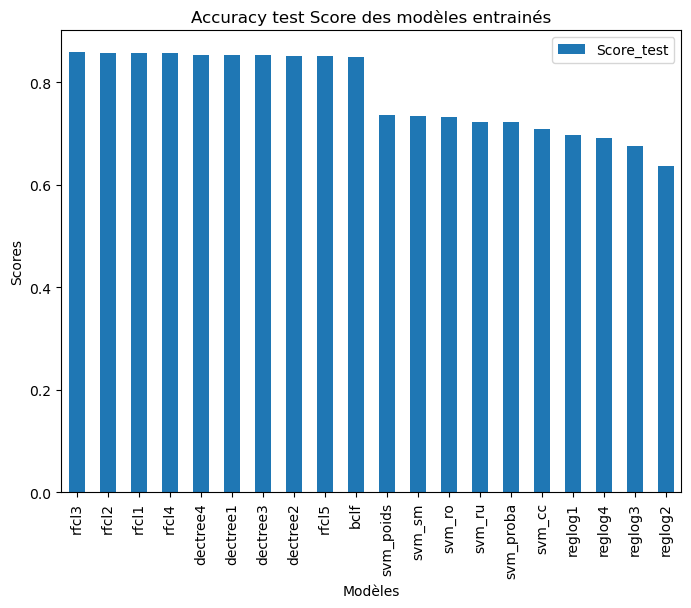

In [48]:
# Graphique des scores
import matplotlib.pyplot as plt
%matplotlib inline

Acuracy_scores.sort_values(by='Score_test', ascending=False, inplace=True)
Acuracy_scores.plot(x = 'Modele', y = 'Score_test', kind='bar', figsize=(8,6))
plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.title('Accuracy test Score des modèles entrainés')
plt.show();


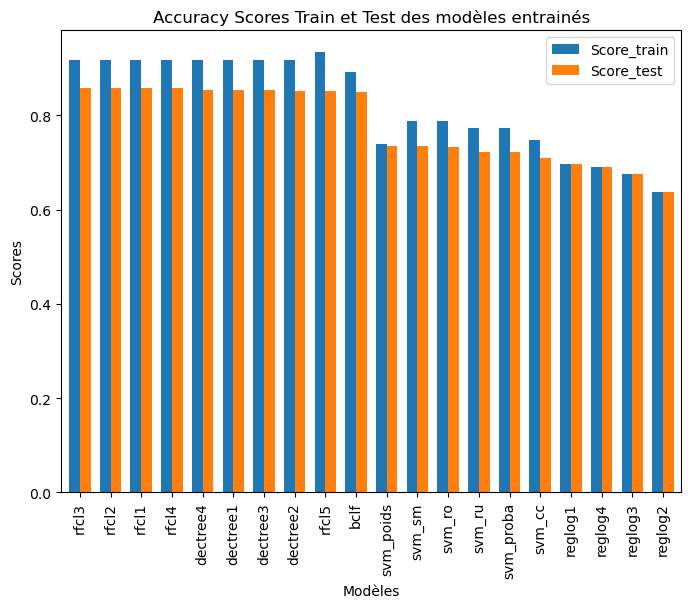

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

Acuracy_scores = pd.read_csv('Acuracy_scores.csv')
Acuracy_scores.sort_values(by='Score_test', ascending=False, inplace=True)
Acuracy_scores.plot(x= 'Modele', column = 'Score_train', kind='bar', figsize=(8,6), width = 0.7)
plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.title('Accuracy Scores Train et Test des modèles entrainés')
plt.show();